# GMU 8 stations plots

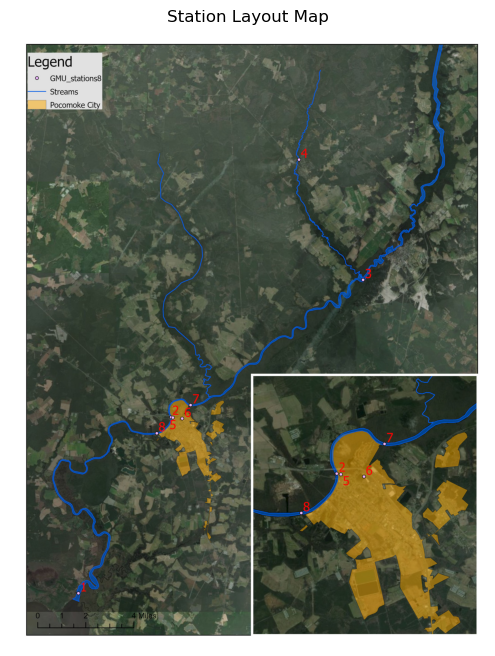

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt  # 

# Show the map of the stations
img = mpimg.imread(r"C:\Github\Data\EESLR\Layout.jpg")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Station Layout Map")
plt.show()


# Plots stations GMU Stage (feet)

In [ ]:
#Note: I changed some information in the channels. So, the plots for stations 5 and 6 will be different.

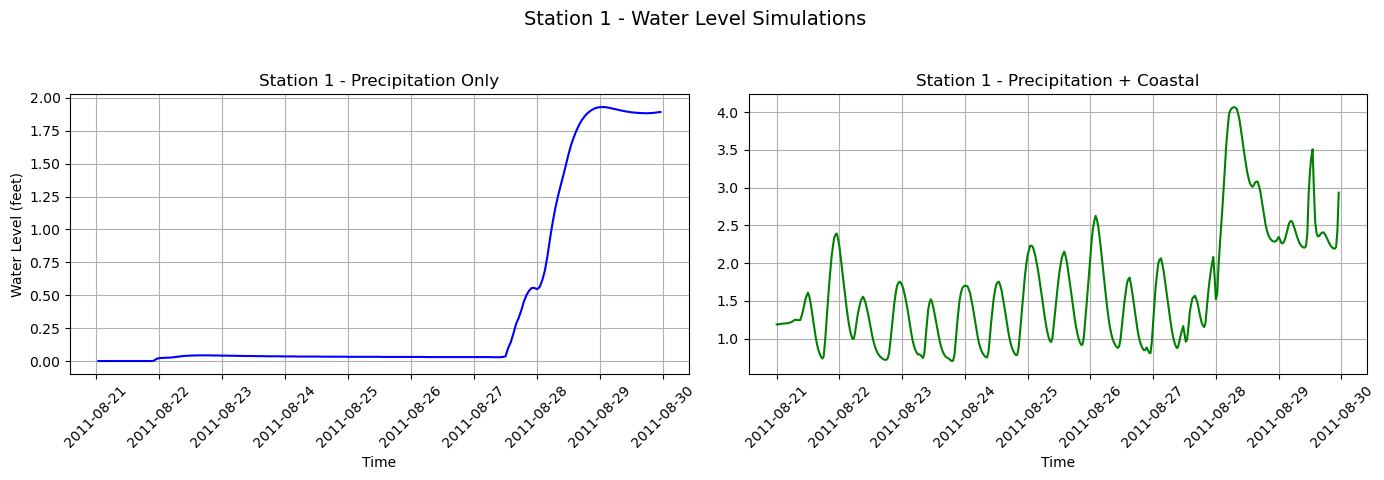

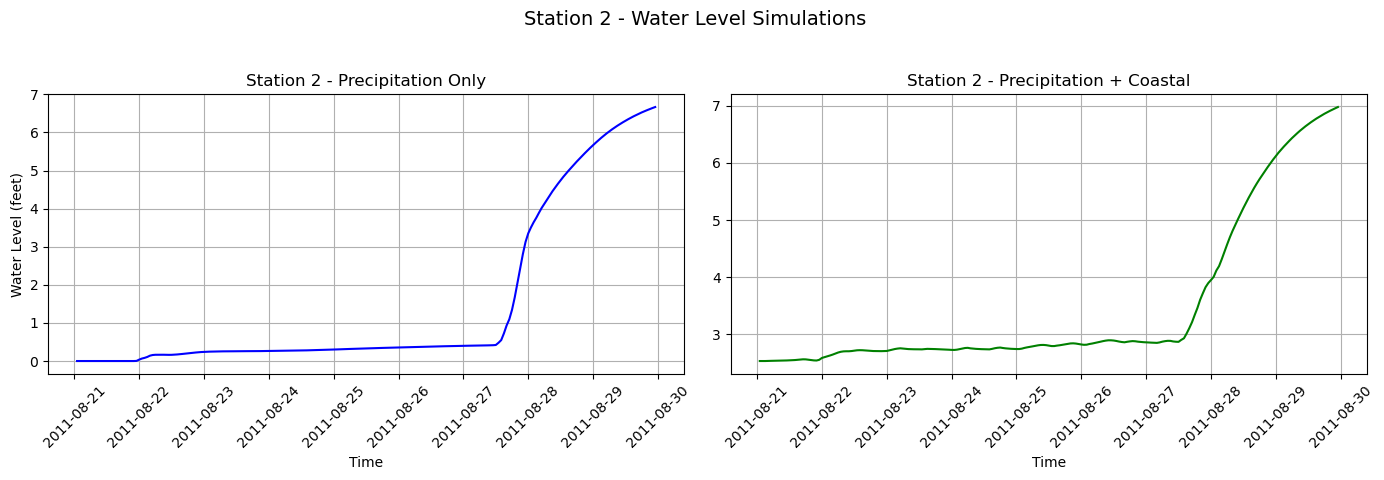

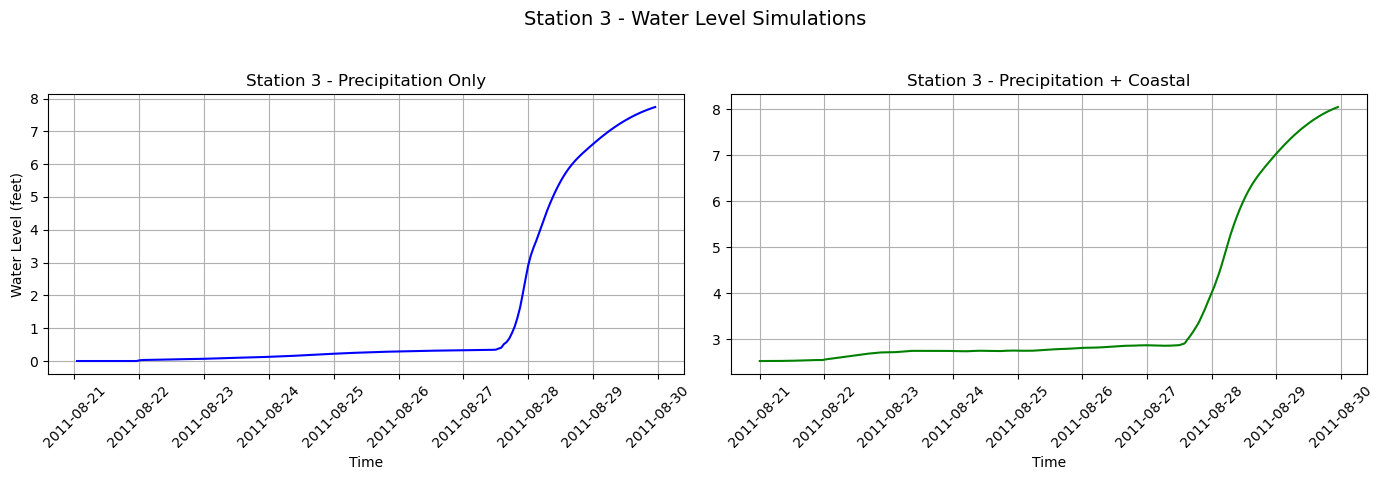

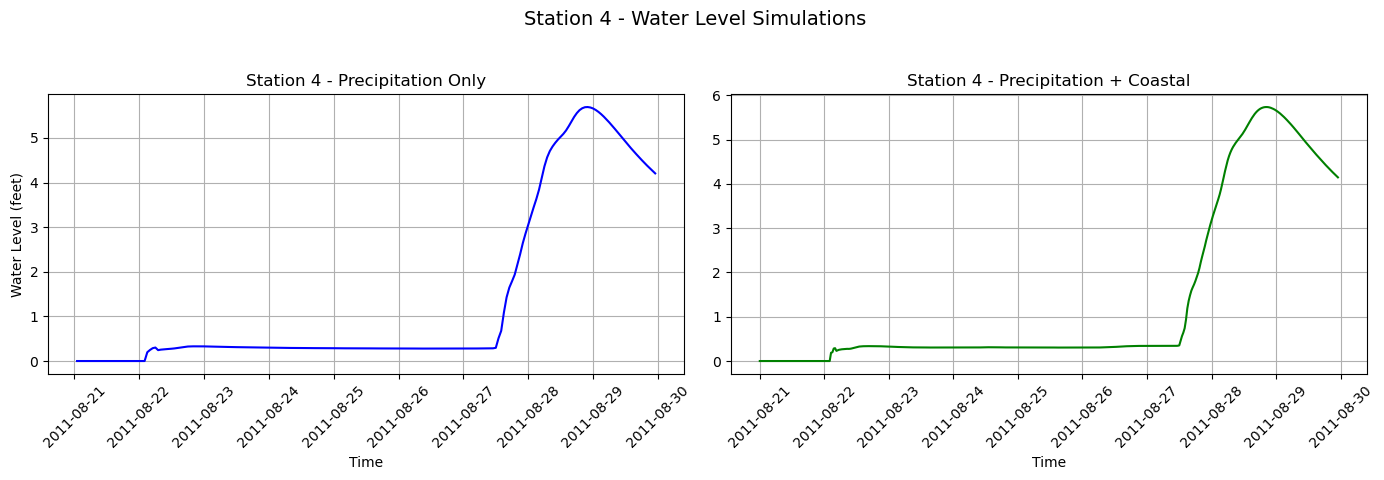

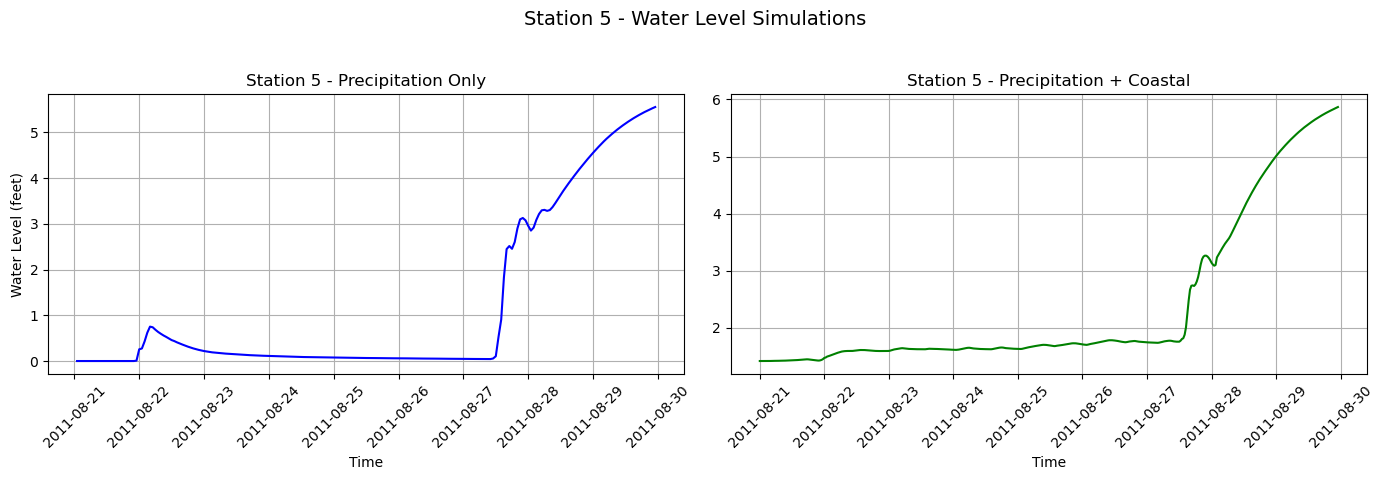

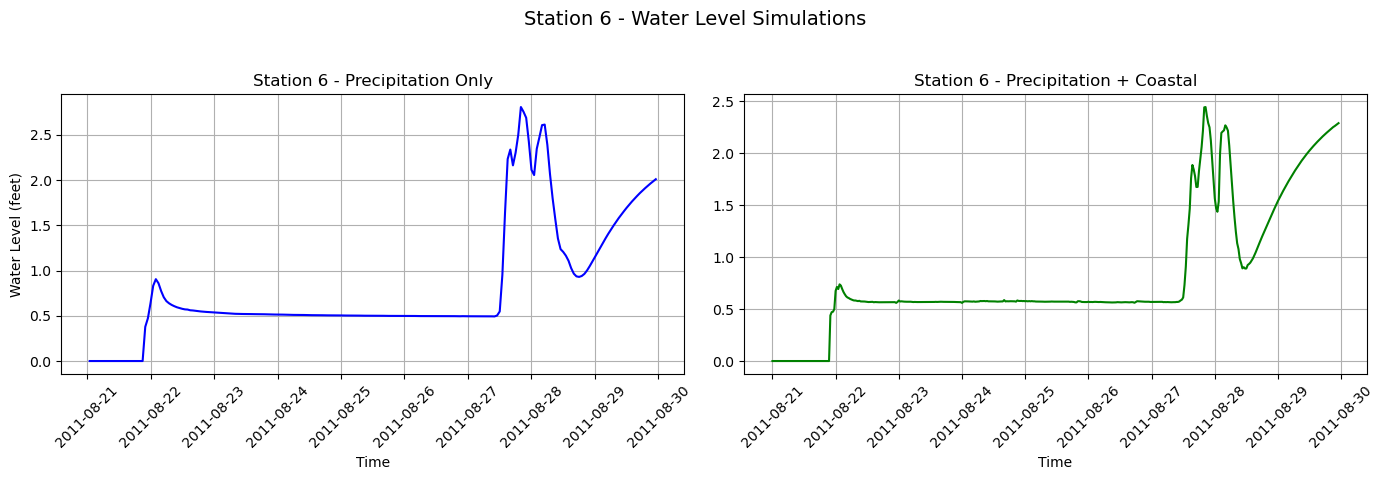

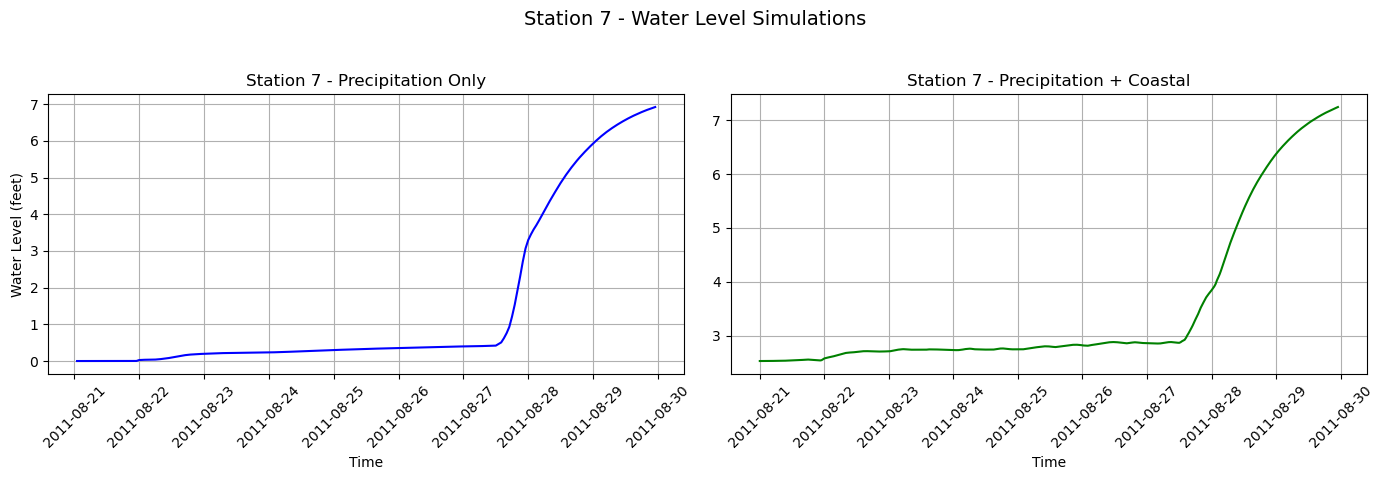

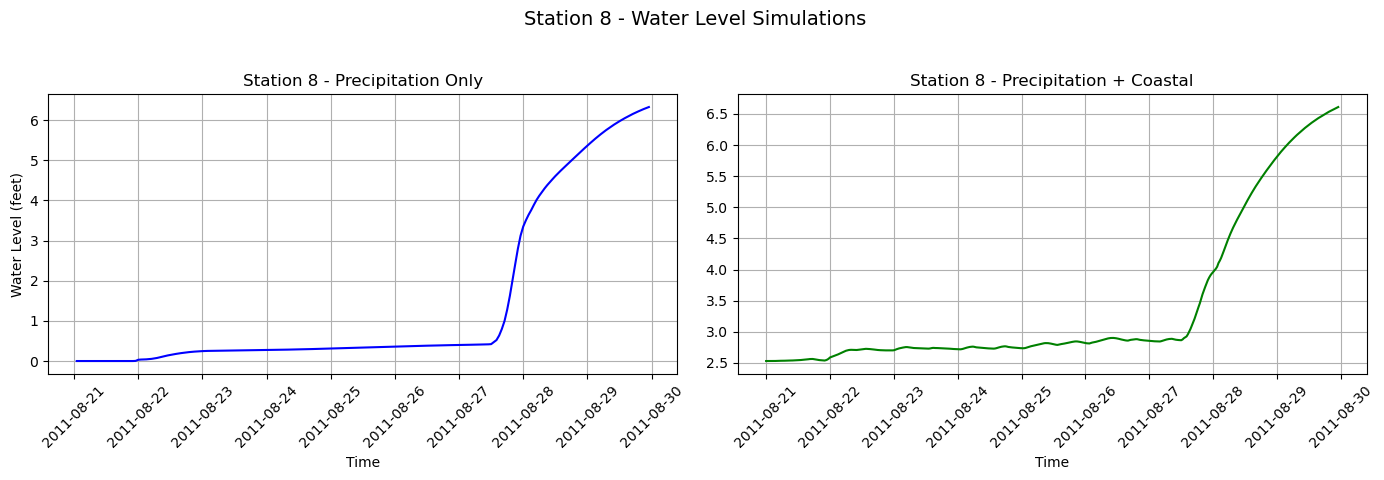

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load your Excel file
file_path = r"C:\Github\Lab_work\Pocomoke\validation\statiosgmu_simulatedSH.xlsx"

# Optional: prepare output folder (not used for now)
output_folder = "station_plots"
os.makedirs(output_folder, exist_ok=True)

# Loop through all 8 sheets (Station 1 to 8)
for i in range(1, 9):
    sheet_name = f"Sheet{i}"
    
    # Read the sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Clean column names
    df.columns = [col.strip() for col in df.columns]
    
    # Convert Time to datetime
    df["Time"] = pd.to_datetime(df["Time"])
    
    # Column names
    time_col = "Time"
    precip_only_col = "2011_Iren2129aug_val2 (feet)"
    coastal_col = "precipcoast2011 (feet)"
    
    # Convert to numeric and clean
    df[precip_only_col] = pd.to_numeric(df[precip_only_col], errors="coerce")
    df[coastal_col] = pd.to_numeric(df[coastal_col], errors="coerce")
    df_clean = df[~df[precip_only_col].isna()]  # Keep rows where precip-only is not NaN
    
    # Plot side by side
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].plot(df_clean[time_col], df_clean[precip_only_col], color="blue")
    axs[0].set_title(f"Station {i} - Precipitation Only")
    axs[0].set_xlabel("Time")
    axs[0].set_ylabel("Water Level (feet)")
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].grid(True)

    axs[1].plot(df[time_col], df[coastal_col], color="green")
    axs[1].set_title(f"Station {i} - Precipitation + Coastal")
    axs[1].set_xlabel("Time")
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].grid(True)

    plt.suptitle(f"Station {i} - Water Level Simulations", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Save plot 
    # output_path = os.path.join(output_folder, f"station{i}.png")
    # plt.savefig(output_path, dpi=300)
    
    plt.show()


# Plots stations GMU Flow H (CFS)

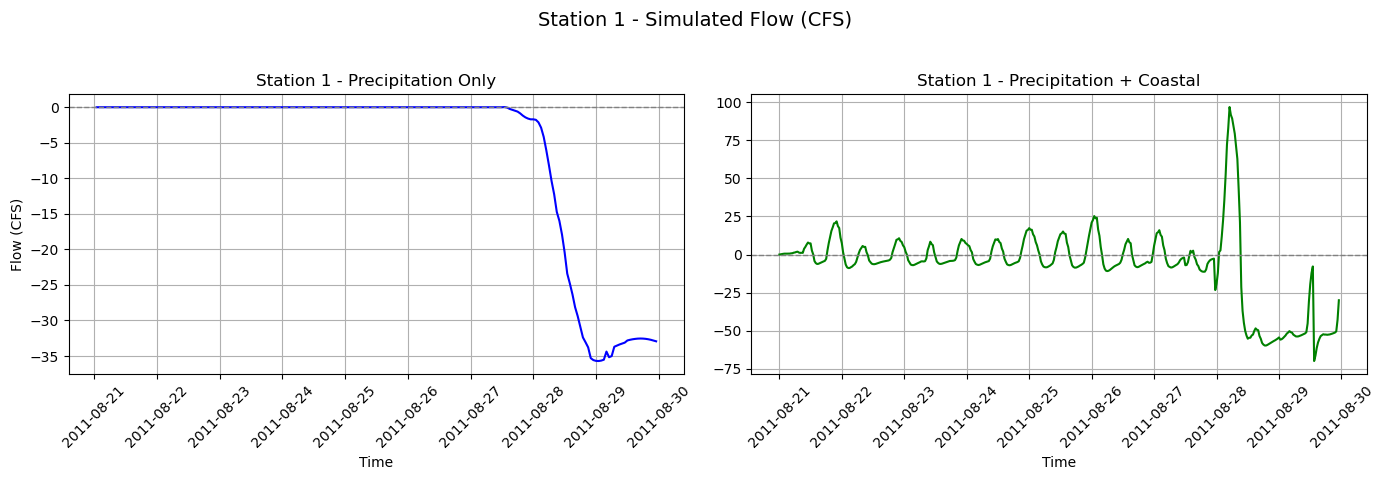

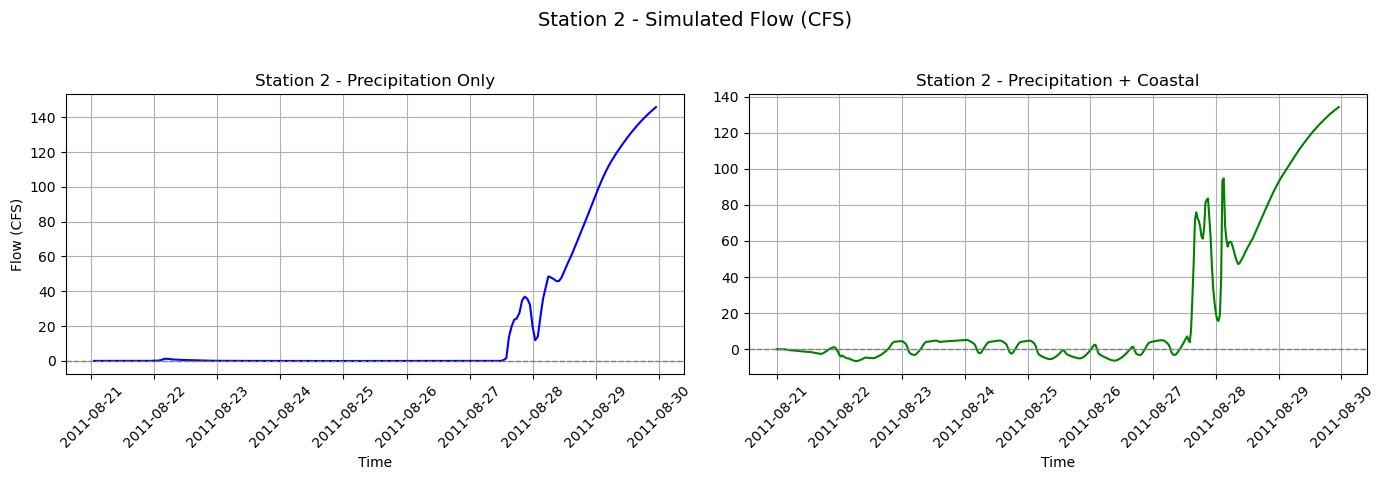

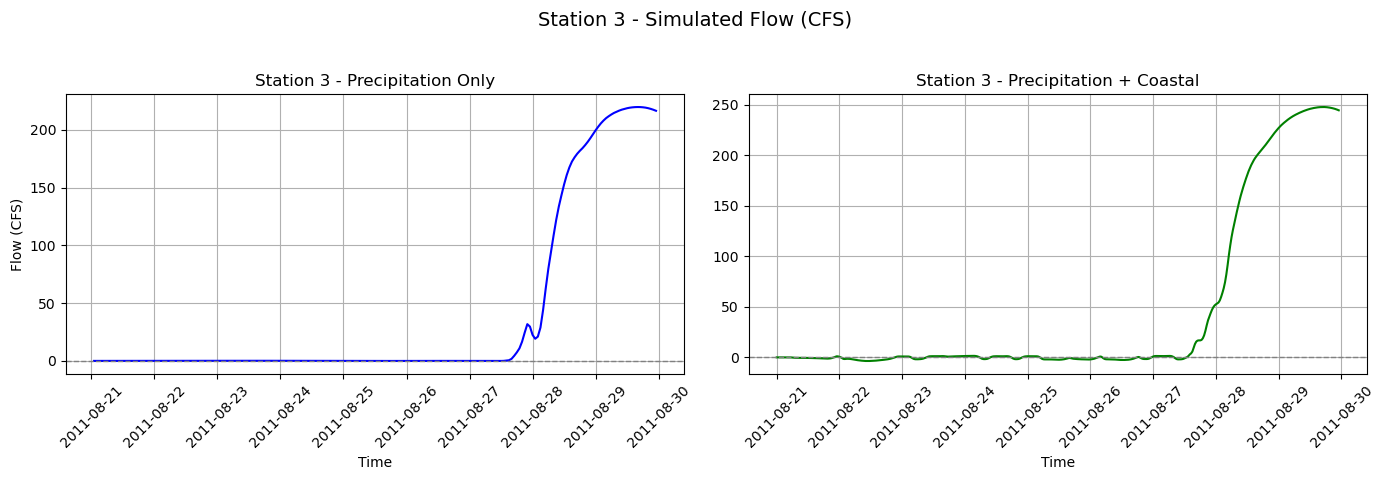

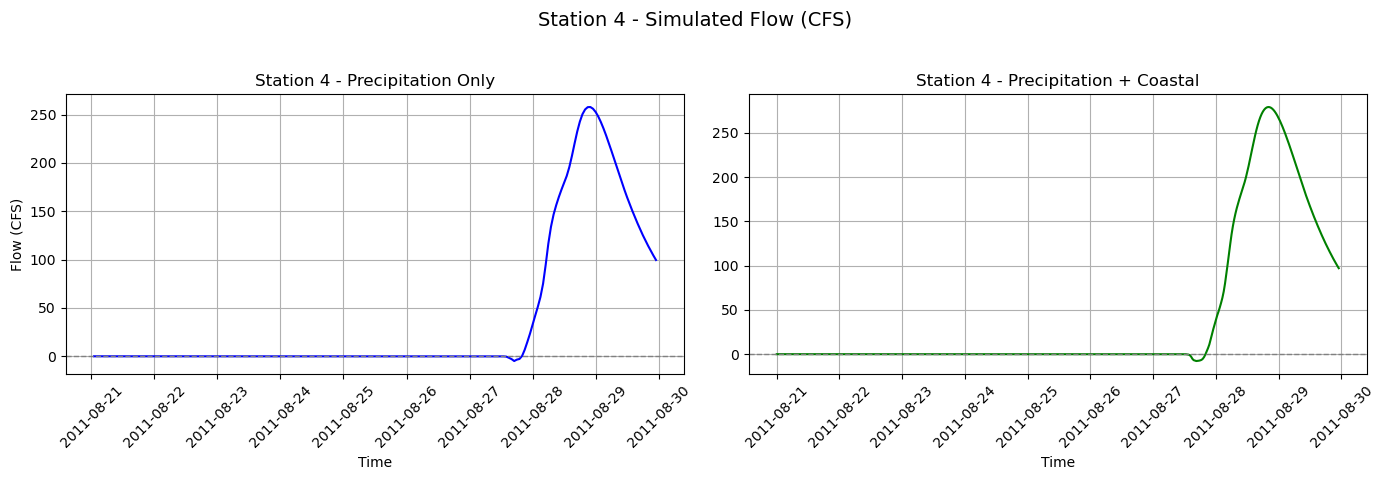

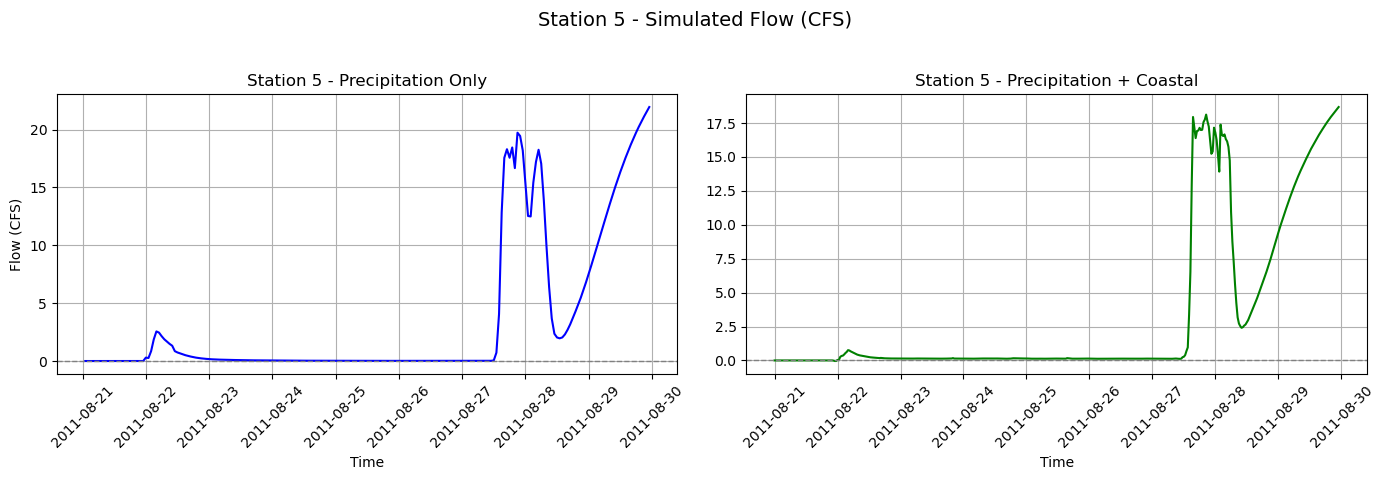

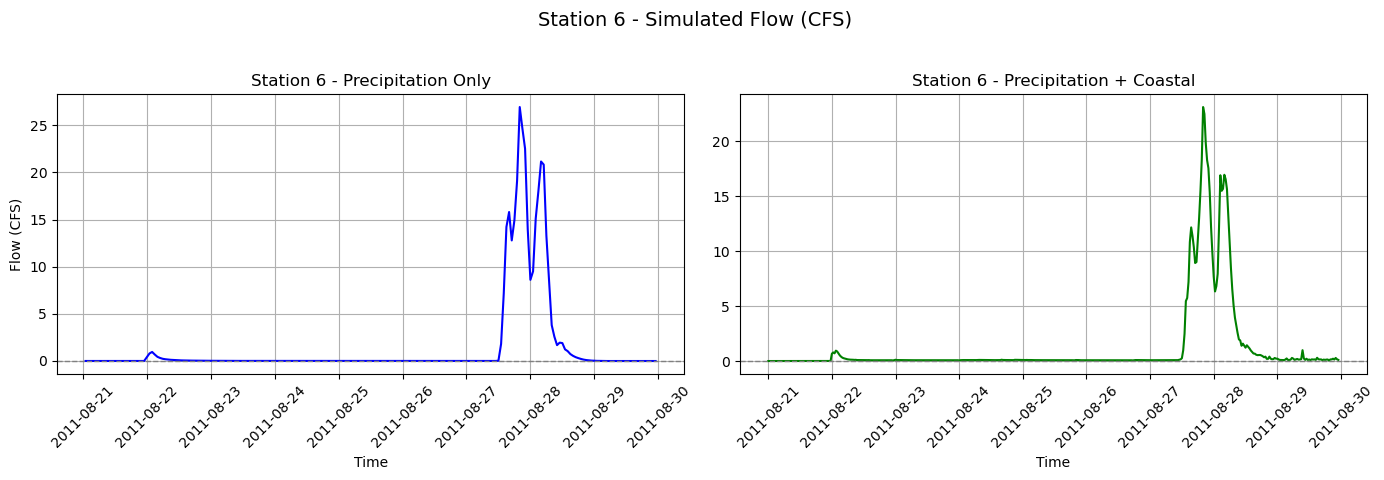

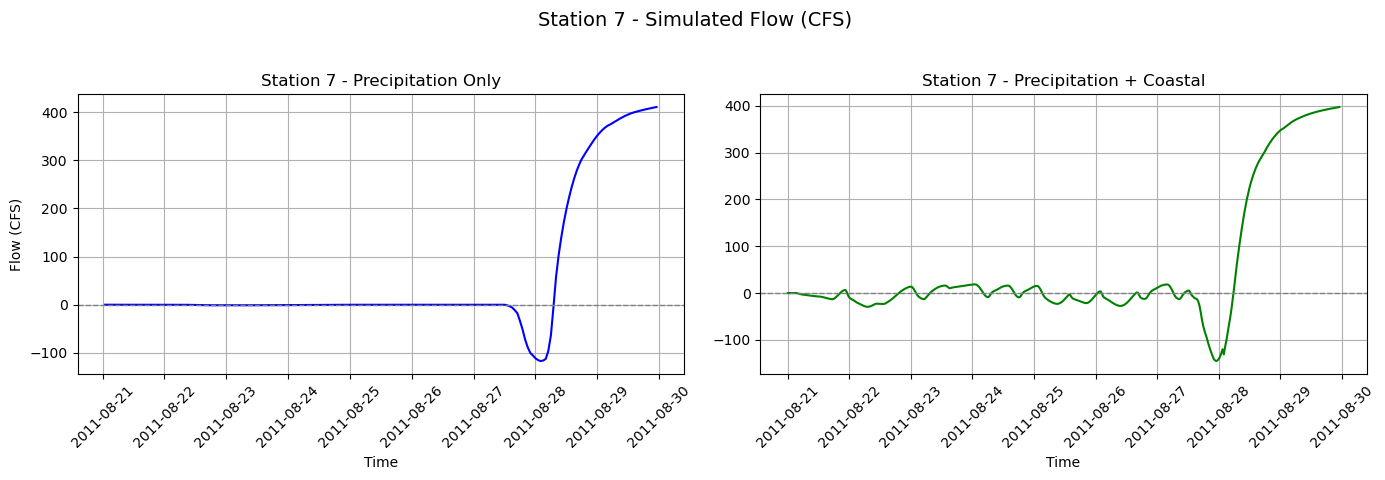

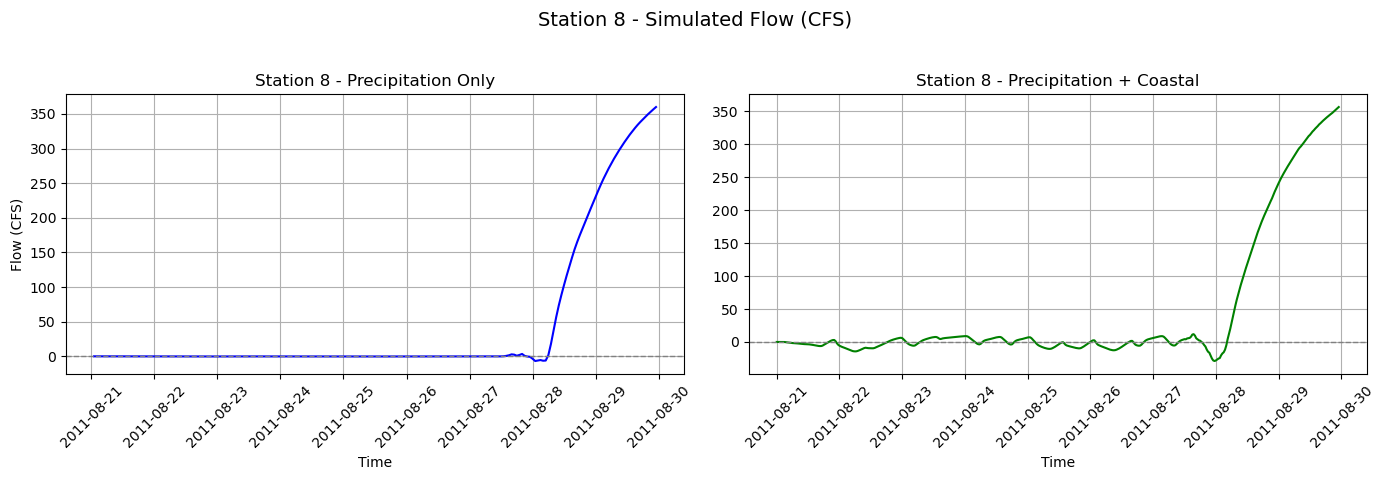

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path to the Excel file
file_path = r"C:\Github\Lab_work\Pocomoke\validation_flow\statiosgmu_simulatedFLOW.xlsx"

# Folder for saving plots (optional)
output_folder = "station_flow_plots"
os.makedirs(output_folder, exist_ok=True)

# Loop through each station sheet
for i in range(1, 9):
    sheet_name = f"Sheet{i}"
    
    # Read the sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Clean column names
    df.columns = [col.strip() for col in df.columns]
    
    # Convert Time to datetime
    df["Time"] = pd.to_datetime(df["Time"])
    
    # Correct column names from your screenshot
    time_col = "Time"
    precip_only_col = "2011_Iren2129aug_val2 [Post Processed] (cfs)"
    coastal_col = "precipcoast2011 [Post Processed] (cfs)"
    
    # Convert to numeric (keep 0, remove NaNs only)
    df[precip_only_col] = pd.to_numeric(df[precip_only_col], errors="coerce")
    df[coastal_col] = pd.to_numeric(df[coastal_col], errors="coerce")
    df_clean = df[~df[precip_only_col].isna()]
    
    # Create side-by-side plots
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Plot: Precipitation Only
    axs[0].plot(df_clean[time_col], df_clean[precip_only_col], color="blue")
    axs[0].axhline(0, color="gray", linestyle="--", linewidth=1)
    axs[0].set_title(f"Station {i} - Precipitation Only")
    axs[0].set_xlabel("Time")
    axs[0].set_ylabel("Flow (CFS)")
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].grid(True)

    # Plot: Precipitation + Coastal
    axs[1].plot(df[time_col], df[coastal_col], color="green")
    axs[1].axhline(0, color="gray", linestyle="--", linewidth=1)
    axs[1].set_title(f"Station {i} - Precipitation + Coastal")
    axs[1].set_xlabel("Time")
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].grid(True)

    # Overall title
    plt.suptitle(f"Station {i} - Simulated Flow (CFS)", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Save plot 
    # output_path = os.path.join(output_folder, f"station{i}_flow.png")
    # plt.savefig(output_path, dpi=300)
    
    plt.show()
